In [1]:
import numpy as np
import os
import math
import h5py
import matplotlib.pyplot as plt
import re
from mpl_toolkits.axes_grid1 import make_axes_locatable

import sys
sys.path.append("/home/kyungtak.lim/python_scripts")

import gbspy as g

In [2]:
import gbspy as g
import numpy as np
import matplotlib.pyplot as plt
import os
import h5py

import multiprocessing as mp
from matplotlib.animation import FuncAnimation
from scipy.interpolate import griddata
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib.ticker import AutoMinorLocator
import matplotlib.lines as mlines
from matplotlib.ticker import AutoMinorLocator

#import sys  

# Get the current working directory|
cwd = os.getcwd()

#os.chdir('/marconi_scratch/userexternal/klim0000/GBS/DN_tria/PT_src_test')
#os.chdir('/marconi_work/FUA36_TSVV2/kyungtak/DN/DN_balanced/DN_nu0p3')
os.chdir('/zhisongqu_data/kyungtak/data_GBS/GBS_SN/nu_scan/SN_nu1')

# Print the current working directory
print("Current working directory: {0}".format(cwd))

# Load GBS simulations
s=g.Sim()

Current working directory: /home/kyungtak.lim/Jupyter_notebook_GBS


/home/kyungtak.lim/python_scripts/gbspy/pp.py:67: FutureWarning: An error has occured when reading the result index from the HDF5 contents:

Traceback (most recent call last):
  File "/home/kyungtak.lim/python_scripts/gbspy/pp.py", line 60, in _read_file_index_from_result
    with h5py.File(path, "r") as f:
  File "/home/kyungtak.lim/miniconda3/envs/jupyter_env/lib/python3.9/site-packages/h5py/_hl/files.py", line 564, in __init__
    fid = make_fid(name, mode, userblock_size, fapl, fcpl, swmr=swmr)
  File "/home/kyungtak.lim/miniconda3/envs/jupyter_env/lib/python3.9/site-packages/h5py/_hl/files.py", line 238, in make_fid
    fid = h5f.open(name, flags, fapl=fapl)
  File "h5py/_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5py/_objects.pyx", line 55, in h5py._objects.with_phil.wrapper
  File "h5py/h5f.pyx", line 102, in h5py.h5f.open
OSError: Unable to synchronously open file (file signature not found)

Attempting to guess index from filename. This behaviour will be

An error occured when opening /zhisongqu_data/kyungtak/data_GBS/GBS_SN/nu_scan/SN_nu1/results_92.h5:
Unable to synchronously open file (file signature not found)
Trying to skip the file...
Last results file skipped


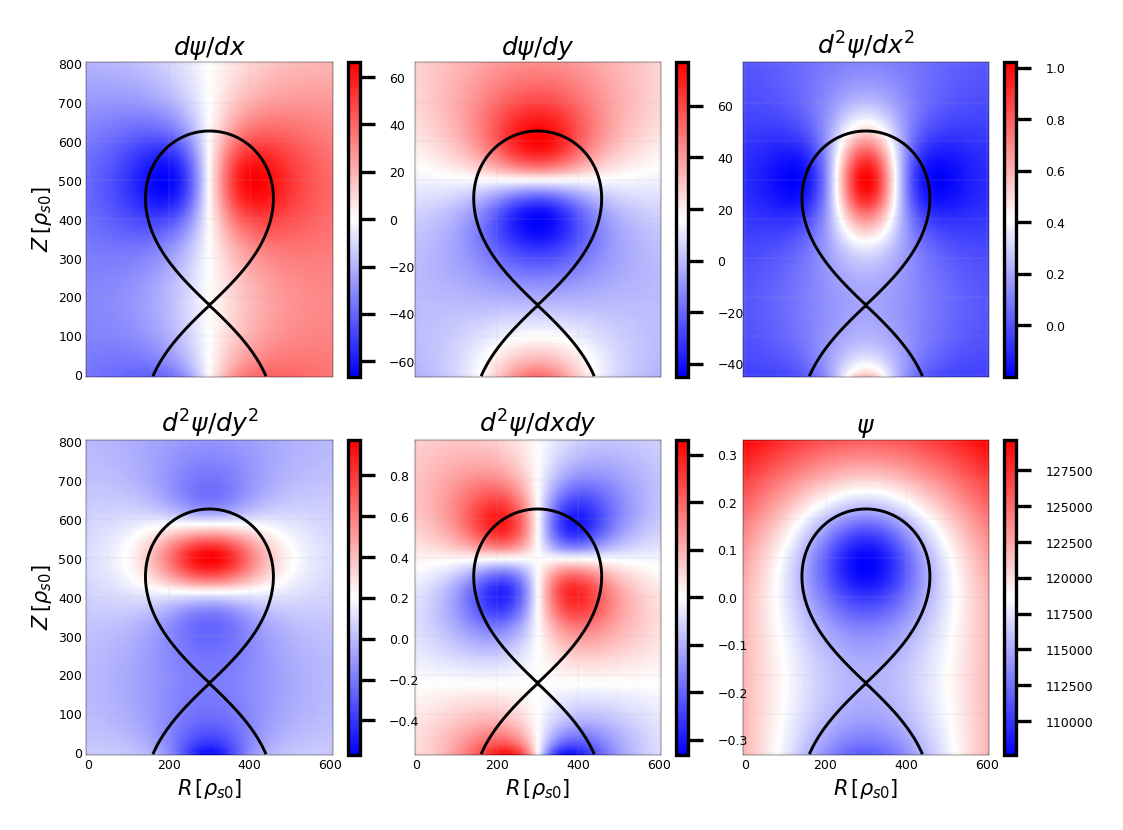

In [3]:
X, Y = np.meshgrid(s.x, s.y)
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(4, 3),  dpi=300, sharex=True, sharey=True)
cs1 = ax[0,0].pcolormesh(X, Y, s.dpsidx_n, cmap='bwr')
cs2 = ax[0,1].pcolormesh(X, Y, s.dpsidy_n, cmap='bwr')
cs3 = ax[0,2].pcolormesh(X, Y, s.d2psidx2_n, cmap='bwr')
cs4 = ax[1,0].pcolormesh(X, Y, s.d2psidy2_n, cmap='bwr')
cs5 = ax[1,1].pcolormesh(X, Y, s.d2psidxdy_n, cmap='bwr')
cs6 = ax[1,2].pcolormesh(X, Y, s.Psi, cmap='bwr')

divider = make_axes_locatable(ax[0,0])
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar=fig.colorbar(cs1, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=3)

divider = make_axes_locatable(ax[0,1])
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar=fig.colorbar(cs2, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=3)

divider = make_axes_locatable(ax[0,2])
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar=fig.colorbar(cs3, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=3)

divider = make_axes_locatable(ax[1,0])
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar=fig.colorbar(cs4, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=3)

divider = make_axes_locatable(ax[1,1])
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar=fig.colorbar(cs5, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=3)

divider = make_axes_locatable(ax[1,2])
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar=fig.colorbar(cs6, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=3)


for i in range(2):
    for j in range(3):
        ax[i,j].contour(X, Y, s.Psi, levels=[s.Psi[s.iyxpt, s.ixxpt]], linewidths=0.7, colors='k')
        ax[i,j].grid(True, which='major', alpha=1., linestyle=':', linewidth=0.1)
        ax[i,j].grid(True, which='minor', alpha=0.2, linestyle=':', linewidth=0.1)
        ax[i,j].xaxis.set_minor_locator(AutoMinorLocator())
        ax[i,j].yaxis.set_minor_locator(AutoMinorLocator())
        ax[i,j].tick_params(axis='x', labelsize=3, pad=1)
        ax[i,j].tick_params(axis='y', labelsize=3, pad=1)
        ax[i,j].tick_params(which='minor', direction="in", size=0)
        ax[i,j].tick_params(which='major', direction="in", size=0)
        ax[i,j].spines["bottom"].set_linewidth(0.1)
        ax[i,j].spines["left"].set_linewidth(0.1)
        ax[i,j].spines["right"].set_linewidth(0.1)
        ax[i,j].spines["top"].set_linewidth(0.1)
        
ax[1,0].set_xlabel(r'$R \,[\rho_{s0}]$', fontsize=5, labelpad=1)
ax[1,1].set_xlabel(r'$R \,[\rho_{s0}]$', fontsize=5, labelpad=1)
ax[1,2].set_xlabel(r'$R \,[\rho_{s0}]$', fontsize=5, labelpad=1)
ax[0,0].set_ylabel(r'$Z\, [\rho_{s0}]$', fontsize=5, rotation=90, labelpad=1)
ax[1,0].set_ylabel(r'$Z\, [\rho_{s0}]$', fontsize=5, rotation=90, labelpad=1)

ax[0,0].set_title(r'$d\psi/dx$', fontsize=6, pad=1.5)
ax[0,1].set_title(r'$d\psi/dy$', fontsize=6, pad=1.5)
ax[0,2].set_title(r'$d^2\psi/dx^2$', fontsize=6, pad=1.5)
ax[1,0].set_title(r'$d^2\psi/dy^2$', fontsize=6, pad=1.5)
ax[1,1].set_title(r'$d^2\psi/dxdy$', fontsize=6, pad=1.5)
ax[1,2].set_title(r'$\psi$', fontsize=6, pad=1.5)


#plt.gca().set_aspect('equal')
plt.show(block=False)

In [4]:
R = s.x #+ s.x0
Bpol = np.sqrt(s.dpsidx_v**2 + s.dpsidy_v**2)

In [16]:
print(np.shape(s.x))
print(np.shape(s.dpsidx_n))

(244,)
(324, 244)


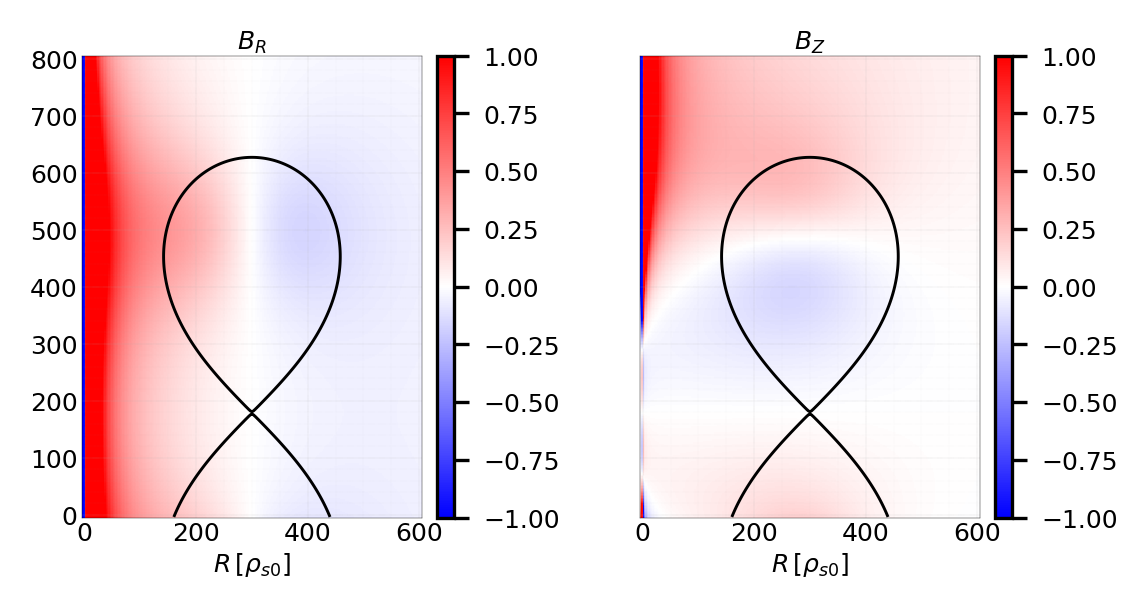

In [23]:
X, Y = np.meshgrid(s.x, s.y)
fig, ax = plt.subplots(ncols=2, figsize=(4, 2),  dpi=300, sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.5)  # Increase horizontal spacing between the two axes

cs1 = ax[0].pcolormesh(X, Y, (-1/R) * s.dpsidx_n, cmap='bwr', vmin=-1, vmax=1.0)
cs2 = ax[1].pcolormesh(X, Y, (1/R) * s.dpsidy_v, cmap='bwr', vmin=-1, vmax=1.0)


divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar=fig.colorbar(cs1, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=6)

divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar=fig.colorbar(cs2, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=6)


for i in range(2):
    ax[i].contour(X, Y, s.Psi, levels=[s.Psi[s.iyxpt, s.ixxpt]], linewidths=0.7, colors='k')
    ax[i].grid(True, which='major', alpha=1., linestyle=':', linewidth=0.1)
    ax[i].grid(True, which='minor', alpha=0.2, linestyle=':', linewidth=0.1)
    ax[i].xaxis.set_minor_locator(AutoMinorLocator())
    ax[i].yaxis.set_minor_locator(AutoMinorLocator())
    ax[i].tick_params(axis='x', labelsize=6, pad=1)
    ax[i].tick_params(axis='y', labelsize=6, pad=1)
    ax[i].tick_params(which='minor', direction="in", size=0)
    ax[i].tick_params(which='major', direction="in", size=0)
    ax[i].spines["bottom"].set_linewidth(0.1)
    ax[i].spines["left"].set_linewidth(0.1)
    ax[i].spines["right"].set_linewidth(0.1)
    ax[i].spines["top"].set_linewidth(0.1)
        
ax[0].set_xlabel(r'$R \,[\rho_{s0}]$', fontsize=6, labelpad=1)
ax[1].set_xlabel(r'$R \,[\rho_{s0}]$', fontsize=6, labelpad=1)

ax[0].set_title(r'$B_R$', fontsize=6, pad=1.5)
ax[1].set_title(r'$B_Z$', fontsize=6, pad=1.5)

#plt.gca().set_aspect('equal')
plt.show(block=False)